# CS 155 Miniproject 2

## Karthik Karnik, Anvita Mishra, Kapil Sinha

## Basic Visualizations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

In [52]:
# encoding must be latin-1 to handle the format of this data
data = np.loadtxt('data/data.txt', delimiter='\t', encoding='latin-1')
# dtype must be None for the function to infer type based on the column
movies = np.genfromtxt('data/movies.txt', delimiter='\t', encoding='latin-1', dtype=None)

In [53]:
train = np.loadtxt('data/train.txt', delimiter='\t', encoding='latin-1')
test = np.loadtxt('data/test.txt', delimiter='\t', encoding='latin-1')

In [54]:
data_df = pd.DataFrame(data)
data_df.columns = ["User ID", "Movie ID", "Rating"]
movies_df = pd.DataFrame(movies)
movies_df.columns = ["Movie ID", "Movie Title", "Unknown", "Action", "Adventure", "Animation", \
                     "Childrens", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", \
                     "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"]
train_df = pd.DataFrame(train)
train_df.columns = ["User ID", "Movie ID", "Rating"]
test_df = pd.DataFrame(test)
test_df.columns = ["User ID", "Movie ID", "Rating"]

In [55]:
data_df.head()

,User ID,Movie ID,Rating
0,196.0,242.0,3.0
1,186.0,302.0,3.0
2,22.0,377.0,1.0
3,244.0,51.0,2.0
4,166.0,346.0,1.0


In [56]:
movies_df.head()

,Movie ID,Movie Title,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


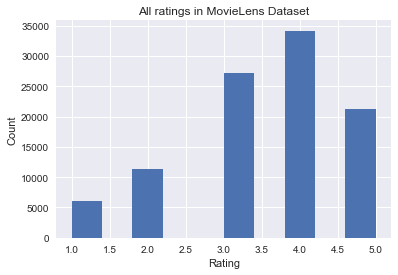

In [119]:
#sns.distplot(data[:,2]) # Equivalent to sns.distplot(data_df["Rating"])
plt.hist(data_df["Rating"])
plt.title("All ratings in MovieLens Dataset")
plt.xlabel("Rating")
plt.ylabel("Count")

In [131]:
import collections

# Returns dictionary whose keys are array elements and values are their corresponding frequencies
def CountFrequency(arr):
    return dict(collections.Counter(arr))

def kLargest(arr, k):
    arr.sort(reverse=True)
    return arr[0:k]

freq = CountFrequency(data_df["Movie ID"])
ten_largest = kLargest(list(freq.values()), 10)
inv_map = {v: k for k, v in freq.items()}
popular_movies = [inv_map[x] for x in ten_largest]
# popular_movies: [50.0, 258.0, 100.0, 181.0, 294.0, 286.0, 288.0, 1.0, 300.0, 121.0]
most_popular_ratings = data_df[np.isin(data_df["Movie ID"], popular_movies)]

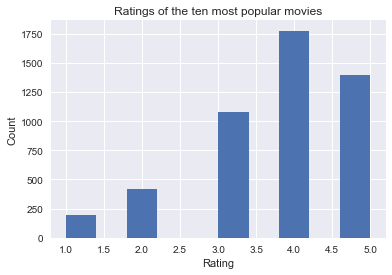

In [132]:
plt.hist(most_popular_ratings["Rating"])
plt.title("Ratings of the ten most popular movies")
plt.xlabel("Rating")
plt.ylabel("Count")

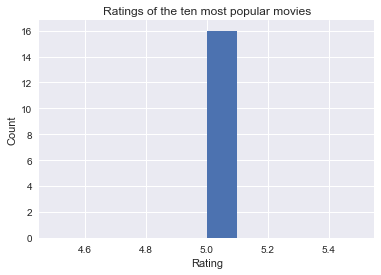

In [159]:
avg_ratings_df = data_df.groupby('Movie ID', as_index=False)['Rating'].mean()
best_ratings = kLargest(list(avg_ratings_df["Rating"]), 10)
best_movie_ids = avg_ratings_df[np.isin(avg_ratings_df["Rating"], best_ratings)]["Movie ID"]
best_movies = data_df[np.isin(data_df["Movie ID"], best_movie_ids)]
plt.hist(best_movies["Rating"])
plt.title("Ratings of the ten most popular movies")
plt.xlabel("Rating")
plt.ylabel("Count")

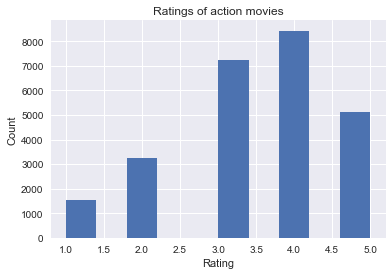

In [162]:
action_movie_ids = list(movies_df[movies_df["Action"] == 1]["Movie ID"])
action_movies = data_df[np.isin(data_df["Movie ID"], action_movie_ids)]
plt.hist(action_movies["Rating"])
plt.title("Ratings of action movies")
plt.xlabel("Rating")
plt.ylabel("Count")

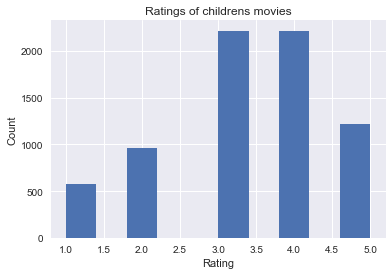

In [167]:
childrens_movie_ids = list(movies_df[movies_df["Childrens"] == 1]["Movie ID"])
childrens_movies = data_df[np.isin(data_df["Movie ID"], childrens_movie_ids)]
plt.hist(childrens_movies["Rating"])
plt.title("Ratings of childrens movies")
plt.xlabel("Rating")
plt.ylabel("Count")

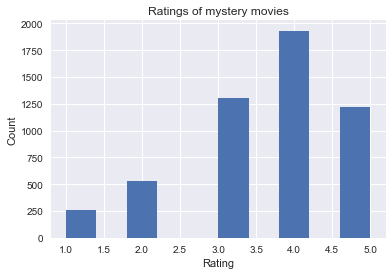

In [168]:
mystery_movie_ids = list(movies_df[movies_df["Mystery"] == 1]["Movie ID"])
mystery_movies = data_df[np.isin(data_df["Movie ID"], mystery_movie_ids)]
plt.hist(mystery_movies["Rating"])
plt.title("Ratings of mystery movies")
plt.xlabel("Rating")
plt.ylabel("Count")